In [41]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('D:\\Abhyass\\THesis\\Thesis_practice\\2021_CSV_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6481 entries, 0 to 6480
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Facility_Id                            6481 non-null   int64  
 1   FRS_Id                                 6326 non-null   float64
 2   Facility_Name                          6481 non-null   object 
 3   City                                   6481 non-null   object 
 4   State                                  6481 non-null   object 
 5   Zip_Code                               6481 non-null   int64  
 6   Address                                6016 non-null   object 
 7   County                                 6219 non-null   object 
 8   Latitude                               6481 non-null   float64
 9   Longitude                              6481 non-null   float64
 10  NAICS_Code                             6481 non-null   int64  
 11  Indu

In [42]:
#remove columns that are not useful for our application
to_remove=['FRS_Id','Address','Industry_Type_Code','NAICS_Code','City','Zip_Code','County',
           'CH4','N2O','HFC','PFC','SF6','NF3','Other_Fully_Fluorinated_GHG_emissions','HFE',
           'Very_Short-lived_Compounds_emissions','Other_GHGs','Biogenic CO2 emissions (metric tons)']

df.drop(columns=to_remove,inplace=True)

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6481 entries, 0 to 6480
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Facility_Id    6481 non-null   int64  
 1   Facility_Name  6481 non-null   object 
 2   State          6481 non-null   object 
 3   Latitude       6481 non-null   float64
 4   Longitude      6481 non-null   float64
 5   Industry_Type  6481 non-null   object 
 6   TRDE_eqCO2     6481 non-null   float64
 7   CO2            5822 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 405.2+ KB


,Facility_Id,Latitude,Longitude,TRDE_eqCO2,CO2
count,6.481000e+03,6481.000000,6481.000000,6.481000e+03,5.822000e+03
mean,1.005632e+06,37.288642,-92.466218,3.880878e+05,4.027307e+05
std,3.913437e+03,5.942355,16.709176,1.152819e+06,1.196395e+06
min,1.000001e+06,13.410000,-174.110000,0.000000e+00,0.000000e+00
25%,1.002402e+06,32.830000,-97.800000,3.199702e+04,2.385905e+04
50%,1.005035e+06,37.760000,-90.230000,6.525725e+04,5.405335e+04
75%,1.007744e+06,41.220000,-82.600000,1.860980e+05,1.869433e+05
max,1.014434e+06,71.290000,144.890000,2.099864e+07,2.083402e+07


In [43]:
## Getting the 'Population within 100KMs' feature

df_popu = pd.read_csv('D:\\Abhyass\\THesis\\Thesis_practice\\us2021census.csv')

# Round latitude and longitude to 2 significant digits so as to match the values from orginal df
df_popu['Latitude'] = df_popu['Latitude'].round(2)
df_popu['Longitude'] = df_popu['Longitude'].round(2)

# Display the modified DataFrame

df_popu.info()

# Function to calculate haversine distance between two sets of coordinates in kilometers
def haversine_vectorized(lat1, lon1, lat2_arr, lon2_arr):
    R = 6371.0  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2_arr)
    lon2_rad = np.radians(lon2_arr)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Calculate population within 100 km for all rows in df
# create the column and set initial value to 0
df['Population_within_100km'] = 0

for index, row in df.iterrows():
    lat_input, lon_input = row['Latitude'], row['Longitude']
    
    # Vectorized distance calculation for all rows in df_popu
    df_popu['Distance'] = haversine_vectorized(lat_input, lon_input, df_popu['Latitude'], df_popu['Longitude'])

    # Calculate population within 100 km using DataFrame filtering
    total_population_within_100km = df_popu.loc[(df_popu['Distance'] <= 100) & (df_popu['Distance'] > 0), 'Population'].sum()

    # Update the 'Population_within_100km' column in df
    df.at[index, 'Population_within_100km'] = total_population_within_100km

    
    
# getting '%_CO2_from_total' by multiplying the ratio of CO2 emissions to TRDE emissions

df['%_CO2_from_total'] = (df['CO2'] / df['TRDE_eqCO2']) * 100


df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        21397 non-null  object 
 1   State       21397 non-null  object 
 2   Type        21397 non-null  object 
 3   Counties    21397 non-null  object 
 4   Population  21397 non-null  int64  
 5   Latitude    21397 non-null  float64
 6   Longitude   21397 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


,Facility_Id,Facility_Name,State,Latitude,Longitude,Industry_Type,TRDE_eqCO2,CO2,Population_within_100km,%_CO2_from_total
0,1004377,121 REGIONAL DISPOSAL FACILITY,TX,33.30,-96.54,Waste,314493.750,NaN,6833185,NaN
1,1010040,15-18565/15-18662,KY,37.27,-83.24,Other,112348.750,NaN,169004,NaN
2,1000112,23rd and 3rd,NY,40.66,-74.00,Power Plants,46081.780,46035.2,18910827,99.898919
3,1003742,31st Street Landfill,IL,41.83,-87.92,Waste,7750.748,319.2,9179638,4.118312
4,1003188,3M BROWNWOOD,TX,31.67,-99.00,Minerals,28243.244,28214.2,102676,99.897165


In [44]:
entry_counts = df['Industry_Type'].value_counts()

# Set the display option to show all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(entry_counts)

Power Plants                                                                                                         1295
Waste                                                                                                                1202
Petroleum and Natural Gas Systems                                                                                    1200
Other                                                                                                                1046
Minerals                                                                                                              362
Chemicals                                                                                                             338
Metals                                                                                                                280
Pulp and Paper                                                                                                        125
Other,Waste             

In [45]:
# Custom mapping logic using str.contains()
def custom_mapping(industry_type):
    if 'Power Plant' in industry_type and not any(word in industry_type for word in [ 'Metals','Refineries']):
        return 'Power Plants'
    elif 'Natural Gas' in industry_type and not any(word in industry_type for word in ['Power Plants', 'Metals',
                                                                                       'Minerals','Pulp and Paper',
                                                                                       'Refineries']):
        return 'Natural Gas Processing'
    elif 'Chemicals' in industry_type and not any(word in industry_type for word in ['Power Plants',
                                                                                     'Refineries',
                                                                                     'Petroleum and Natural Gas Systems',
                                                                                     'Waste']):
        return 'Chemicals'
    elif 'Refineries' in industry_type and not any(word in industry_type for word in ['Power Plants']):
        return 'Refineries'
    elif 'Metals' in industry_type  and not any(word in industry_type for word in ['Power Plants']):
        return 'Metals'
    elif 'Pulp and Paper' in industry_type:
        return 'Paper'
    elif 'Waste' in industry_type and not any(word in industry_type for word in ['Power Plants',
                                                                                 'Metals',
                                                                                 'Minerals','Pulp and Paper','Refineries']):
        return 'Waste'
    elif 'Minerals' in industry_type and not any(word in industry_type for word in [ 'Metals']):
        return 'Minerals'
    else:
        return 'Other'

#df['Industry_Class']=0   
    
# Apply the custom mapping logic using apply() to create a new 'Industry_Class' column in df_3
df['Industry_Class'] = df['Industry_Type'].apply(lambda x: custom_mapping(x) if pd.notnull(x) else None)

# Rows with 'Industry_Class' as 'Metals' and 'Facility_Name' containing the word 'Steel'
 # Make a copy to avoid modifying the original DataFrame
metals_steel_df = df[df['Industry_Class'] == 'Metals'].copy() 
metals_steel_df.loc[metals_steel_df['Facility_Name'].str.contains('Steel', case=False), 'Industry_Class'] = 'Metals:Steel'
# Update the modified rows in the original DataFrame 
df.update(metals_steel_df)

# Same way find the outliers of Cement industry
cement_df = df[df['Industry_Class'] == 'Minerals'].copy()
cement_df.loc[cement_df['Facility_Name'].str.contains('Cement', case=False), 'Industry_Class'] = 'Cement'
df.update(cement_df)

# Same for the Ethanol Outliers
eth_df = df[df['Industry_Class'] == 'Other'].copy()
eth_df.loc[eth_df['Facility_Name'].str.contains('Ethanol', case=False), 'Industry_Class'] = 'Ethanol'
df.update(eth_df)



In [46]:
# as we further need to divide power plants based on their fuel type
fuel_info = pd.read_csv('D:\\Abhyass\\THesis\\DATA\\fuel_type.csv', encoding='ISO-8859-1')
# Drop duplicates based on 'Facility_Id'
fuel_info_unique = fuel_info.drop_duplicates(subset='Facility_Id', keep='first')
# Merge the 'fuel_info_unique' dataset with 'df' based on 'Facility_Id'
df = df.merge(fuel_info_unique[['Facility_Id', 'General Fuel Type']], on='Facility_Id', how='left')
# Rename the 'General Fuel Type' column to 'fuel_type'
df.rename(columns={'General Fuel Type': 'fuel_type'}, inplace=True)
## by viewing the sample of dataframe and by using functions such as .value_counts() and .unique() we identified key outliers.


# Fill NaN values in 'fuel_type' column with a default value
df['fuel_type'].fillna('Unknown', inplace=True)
# Ensure 'Industry_Class' is a string column
df['Industry_Class'] = df['Industry_Class'].astype(str)

# Update 'Industry_Class' values based on fuel type
df.loc[(df['fuel_type'] == 'Coal') & (df['Industry_Class'] == 'Power Plants'), 'Industry_Class'] = 'Power Plants:Coal'
df.loc[(df['fuel_type'] == 'Natural Gas') & (df['Industry_Class'] == 'Power Plants'), 'Industry_Class'] = 'Power Plants:NGCC'
df.loc[(df['fuel_type'] == 'Petroleum Products') & (df['Industry_Class'] == 'Power Plants'), 'Industry_Class'] = 'Power Plants:Oil Fired'

# List of  'Industry_Class' values to keep for clustering 
valid_industry_classes = ['Power Plants:NGCC', 'Power Plants:Coal', 'Power Plants:Oil Fired', 'Metals:Steel', 'Cement', 'Refineries', 'Natural Gas Processing', 'Paper', 'Ethanol']

# Filter the DataFrame to keep only the rows with valid 'Industry_Class' values
df2 = df[df['Industry_Class'].isin(valid_industry_classes)]

df2.head()

C:\Users\Preetam\AppData\Local\Temp\ipykernel_11100\3972773380.py:2: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel_info = pd.read_csv('D:\\Abhyass\\THesis\\DATA\\fuel_type.csv', encoding='ISO-8859-1')


,Facility_Id,Facility_Name,State,Latitude,Longitude,Industry_Type,TRDE_eqCO2,CO2,Population_within_100km,%_CO2_from_total,Industry_Class,fuel_type
2,1000112.0,23rd and 3rd,NY,40.66,-74.00,Power Plants,46081.780,46035.2,18910827.0,99.898919,Power Plants:NGCC,Natural Gas
15,1001106.0,48th Street Peaking Station,MI,42.76,-86.09,Power Plants,38254.660,38216.3,1411409.0,99.899725,Power Plants:Oil Fired,Petroleum Products
17,1000766.0,59th Street,NY,40.77,-73.99,Power Plants,180185.666,179998.5,18920120.0,99.896126,Power Plants:Oil Fired,Petroleum Products
18,1000767.0,74th Street,NY,40.77,-73.95,Power Plants,195068.358,194857.1,18924149.0,99.891701,Power Plants:Oil Fired,Petroleum Products
19,1001033.0,A B Brown Generating Station,IN,37.91,-87.72,Power Plants,3077205.934,3052764.3,479887.0,99.205720,Power Plants:Coal,Coal


In [47]:
# Create the df_additional for the data we found which is imporatant for CCU

data_additional = {
    'Industry_Class': ['Power Plants:NGCC', 'Power Plants:Coal', 'Power Plants:Oil Fired' , 'Metals:Steel', 'Cement',
                       'Refineries',  'Natural Gas Processing', 'Paper', 'Ethanol'],
    'Partial_Pressure_CO2 (kPa)': [4.6, 13.0, 10, 30, 18, 10,  50, 16, 85], 
    'Capture_Cost ($/ton of CO2)': [80, 50, 60, 65, 40, 60,  10, 65, 20], 
    'Capture_Efficiency (%)': [75, 90, 90, 50, 85, 50, 75, 60, 70], 
    'TRL (Technology Readiness Level)': [9, 9, 9, 9, 6, 9, 9, 9, 8],  
    'Capture Method' : ['Amines','Amines', 'Amines', 'Amines', 'Amines','Amines', 'Amines', 'Amines', 'Dehydration']
}


df_additional = pd.DataFrame(data_additional)


# Merge the 'df_4' DataFrame with 'df_additional' based on 'Industry_Class'
df2 = df2.merge(df_additional, on='Industry_Class', how='left')

df2.dropna()

df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3127 entries, 0 to 3126
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Facility_Id                       3127 non-null   float64
 1   Facility_Name                     3127 non-null   object 
 2   State                             3127 non-null   object 
 3   Latitude                          3127 non-null   float64
 4   Longitude                         3127 non-null   float64
 5   Industry_Type                     3127 non-null   object 
 6   TRDE_eqCO2                        3127 non-null   float64
 7   CO2                               3127 non-null   float64
 8   Population_within_100km           3127 non-null   float64
 9   %_CO2_from_total                  3111 non-null   float64
 10  Industry_Class                    3127 non-null   object 
 11  fuel_type                         3127 non-null   object 
 12  Partia

In [48]:
# duplicate the data 
dfc=df2.copy()


In [49]:
dfc =dfc.dropna()
dfc.head()

,Facility_Id,Facility_Name,State,Latitude,Longitude,Industry_Type,TRDE_eqCO2,CO2,Population_within_100km,%_CO2_from_total,Industry_Class,fuel_type,Partial_Pressure_CO2 (kPa),Capture_Cost ($/ton of CO2),Capture_Efficiency (%),TRL (Technology Readiness Level),Capture Method
0,1000112.0,23rd and 3rd,NY,40.66,-74.00,Power Plants,46081.780,46035.2,18910827.0,99.898919,Power Plants:NGCC,Natural Gas,4.6,80,75,9,Amines
1,1001106.0,48th Street Peaking Station,MI,42.76,-86.09,Power Plants,38254.660,38216.3,1411409.0,99.899725,Power Plants:Oil Fired,Petroleum Products,10.0,60,90,9,Amines
2,1000766.0,59th Street,NY,40.77,-73.99,Power Plants,180185.666,179998.5,18920120.0,99.896126,Power Plants:Oil Fired,Petroleum Products,10.0,60,90,9,Amines
3,1000767.0,74th Street,NY,40.77,-73.95,Power Plants,195068.358,194857.1,18924149.0,99.891701,Power Plants:Oil Fired,Petroleum Products,10.0,60,90,9,Amines
4,1001033.0,A B Brown Generating Station,IN,37.91,-87.72,Power Plants,3077205.934,3052764.3,479887.0,99.205720,Power Plants:Coal,Coal,13.0,50,90,9,Amines


In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

C:\Users\Preetam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Preetam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Preetam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Preetam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Preetam\anaconda3\lib\site-packages\skl

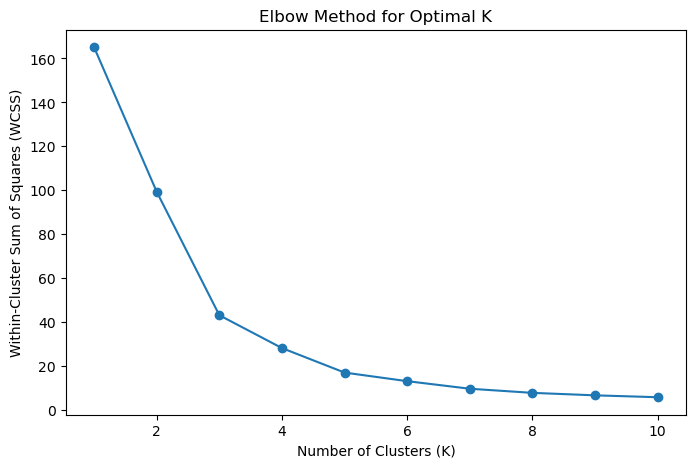

In [51]:
data1 = dfc[[  '%_CO2_from_total', 'Population_within_100km']]

# Feature scaling
scaler = MinMaxScaler()
scaled_data1 = scaler.fit_transform(data1)


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose a range of K values to try
k_values = range(1, 11)
wcss = []

# Calculate the within-cluster sum of squares for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=69)
    kmeans.fit(scaled_data1)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


C:\Users\Preetam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


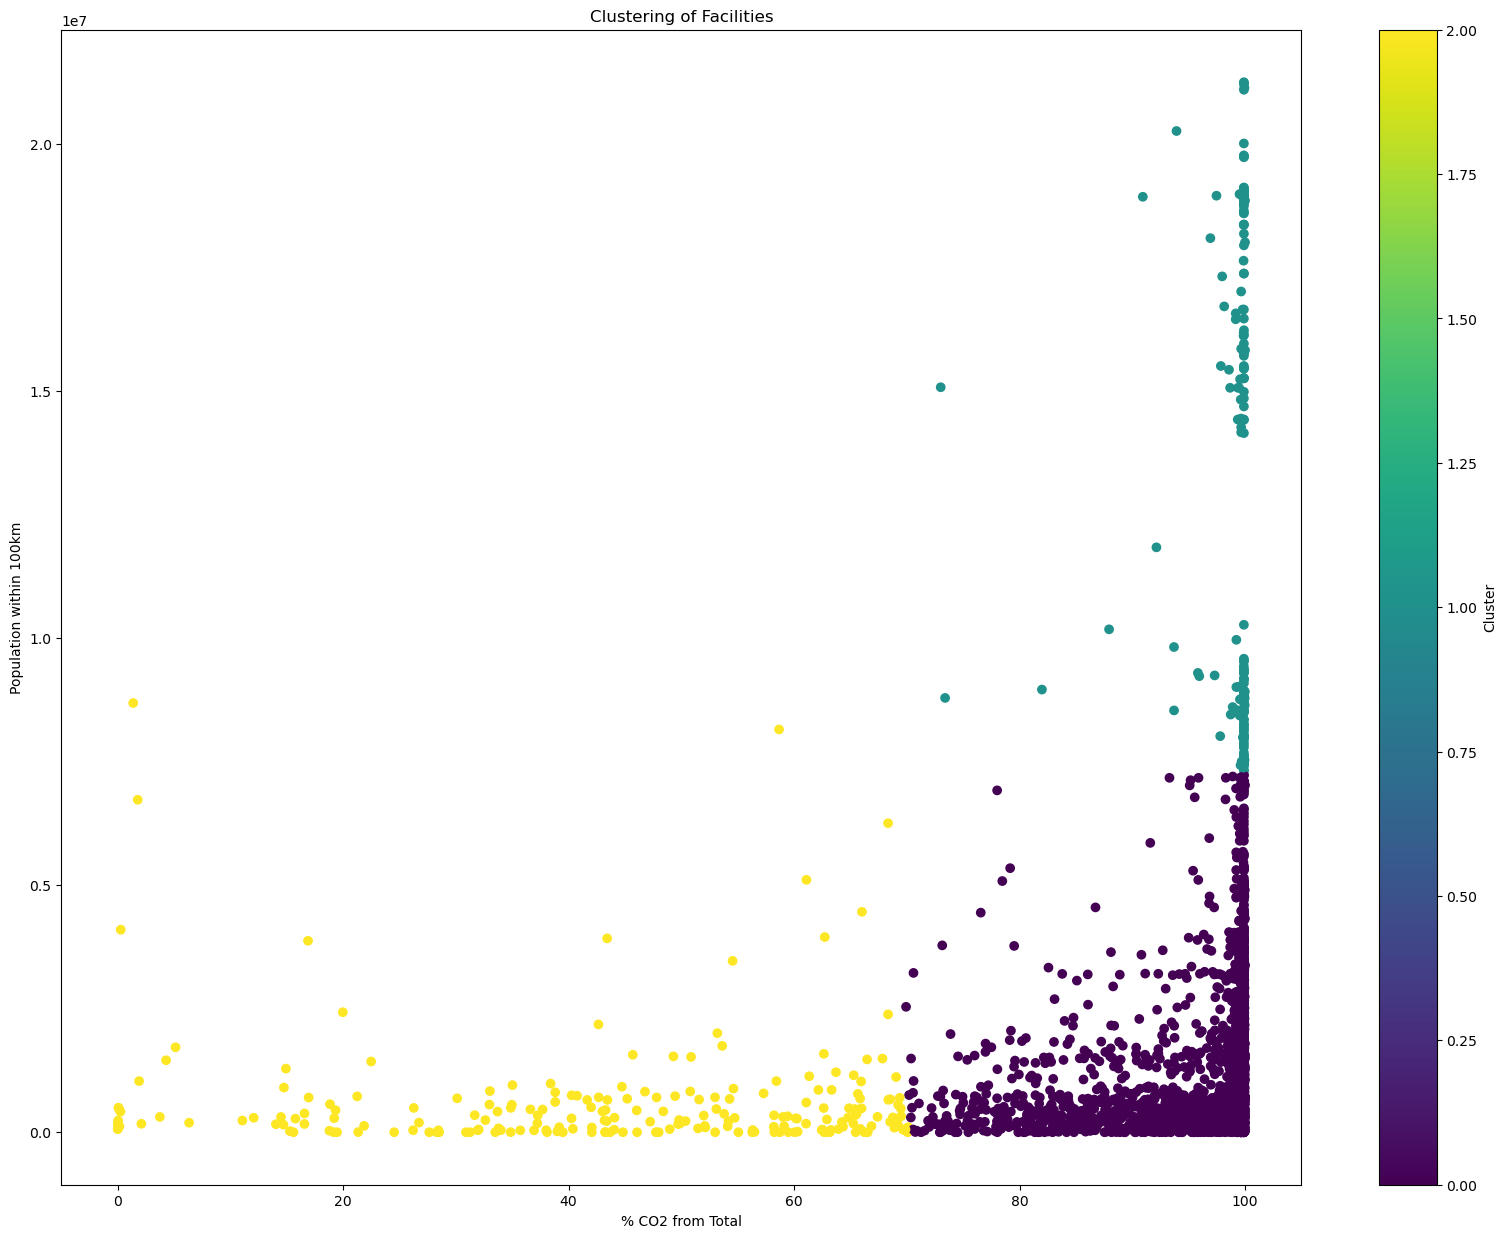

In [78]:

# increase the size of the plots
plt.rcParams["figure.figsize"] = (20, 15)

# Choose the number of clusters (K) based on the elbow method 
num_clusters = 3

# K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=69)
clusters = kmeans.fit_predict(scaled_data1)

# Add the cluster labels to the DataFrame
dfc['Cluster'] = clusters

# Create the scatter plot
x = data1['%_CO2_from_total']
y = data1['Population_within_100km']
xlab = '% CO2 from Total'
ylab = 'Population within 100km'


# Create the scatter plot
scatter = plt.scatter(x, y, c=clusters, cmap='viridis')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Clustering of Facilities')

# Adding a colorbar using the scatter plot as the mappable
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')

plt.show()

In [79]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_data1, clusters)

# Print the Silhouette Score
print("The average silhouette score for the K-means clustering is:", silhouette_avg)


The average silhouette score for the K-means clustering is: 0.7385867534167385


In [101]:
df_c1 = dfc[dfc['Cluster'] == 1].copy()
df_c1.info()
df_c0 = dfc[dfc['Cluster'] == 0].copy()
df_c0.info()
df_c2 = dfc[dfc['Cluster'] == 2].copy()
df_c2.info()
print('The mean value of additional features for each cluster')
print('')
print('')
mean_partial_pressure = df_c0['Partial_Pressure_CO2 (kPa)'].mean()
mean_capture_cost = df_c0['Capture_Cost ($/ton of CO2)'].mean()
mean_capture_efficiency = df_c0['Capture_Efficiency (%)'].mean()
print('mean partial pressure in cluster 0')
print(mean_partial_pressure)
print('mean capture cost in cluster 0')
print(mean_capture_cost)
print('mean capture efficinecy in cluster 0')
print(mean_capture_efficiency)
print('')
mean_partial_pressure1 = df_c1['Partial_Pressure_CO2 (kPa)'].mean()
mean_capture_cost1 = df_c1['Capture_Cost ($/ton of CO2)'].mean()
mean_capture_efficiency1 = df_c1['Capture_Efficiency (%)'].mean()
print('mean partial pressure in cluster 1')
print(mean_partial_pressure1)
print('mean capture cost in cluster 1')
print(mean_capture_cost1)
print('mean capture efficinecy in cluster 1')
print(mean_capture_efficiency1)
print('')
mean_partial_pressure1 = df_c2['Partial_Pressure_CO2 (kPa)'].mean()
mean_capture_cost1 = df_c2['Capture_Cost ($/ton of CO2)'].mean()
mean_capture_efficiency1 = df_c2['Capture_Efficiency (%)'].mean()
print('mean partial pressure in cluster 2')
print(mean_partial_pressure1)
print('mean capture cost in cluster 2')
print(mean_capture_cost1)
print('mean capture efficinecy in cluster 2')
print(mean_capture_efficiency1)
print('')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 3112
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Facility_Id                       207 non-null    float64
 1   Facility_Name                     207 non-null    object 
 2   State                             207 non-null    object 
 3   Latitude                          207 non-null    float64
 4   Longitude                         207 non-null    float64
 5   Industry_Type                     207 non-null    object 
 6   TRDE_eqCO2                        207 non-null    float64
 7   CO2                               207 non-null    float64
 8   Population_within_100km           207 non-null    float64
 9   %_CO2_from_total                  207 non-null    float64
 10  Industry_Class                    207 non-null    object 
 11  fuel_type                         207 non-null    object 
 12  Partial

In [91]:
df_c1["Industry_Class"].value_counts()

Power Plants:Oil Fired    79
Power Plants:NGCC         67
Natural Gas Processing    22
Refineries                16
Metals:Steel              10
Paper                      8
Cement                     3
Power Plants:Coal          2
Name: Industry_Class, dtype: int64

In [80]:
#prep another df for spectral clustering.
df_sc = df2.dropna()

# Select the features
data2 = df_sc[['%_CO2_from_total', 'Population_within_100km']]

# Feature scaling
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(data2)



C:\Users\Preetam\AppData\Local\Temp\ipykernel_11100\2783977298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sc['Cluster'] = clusters


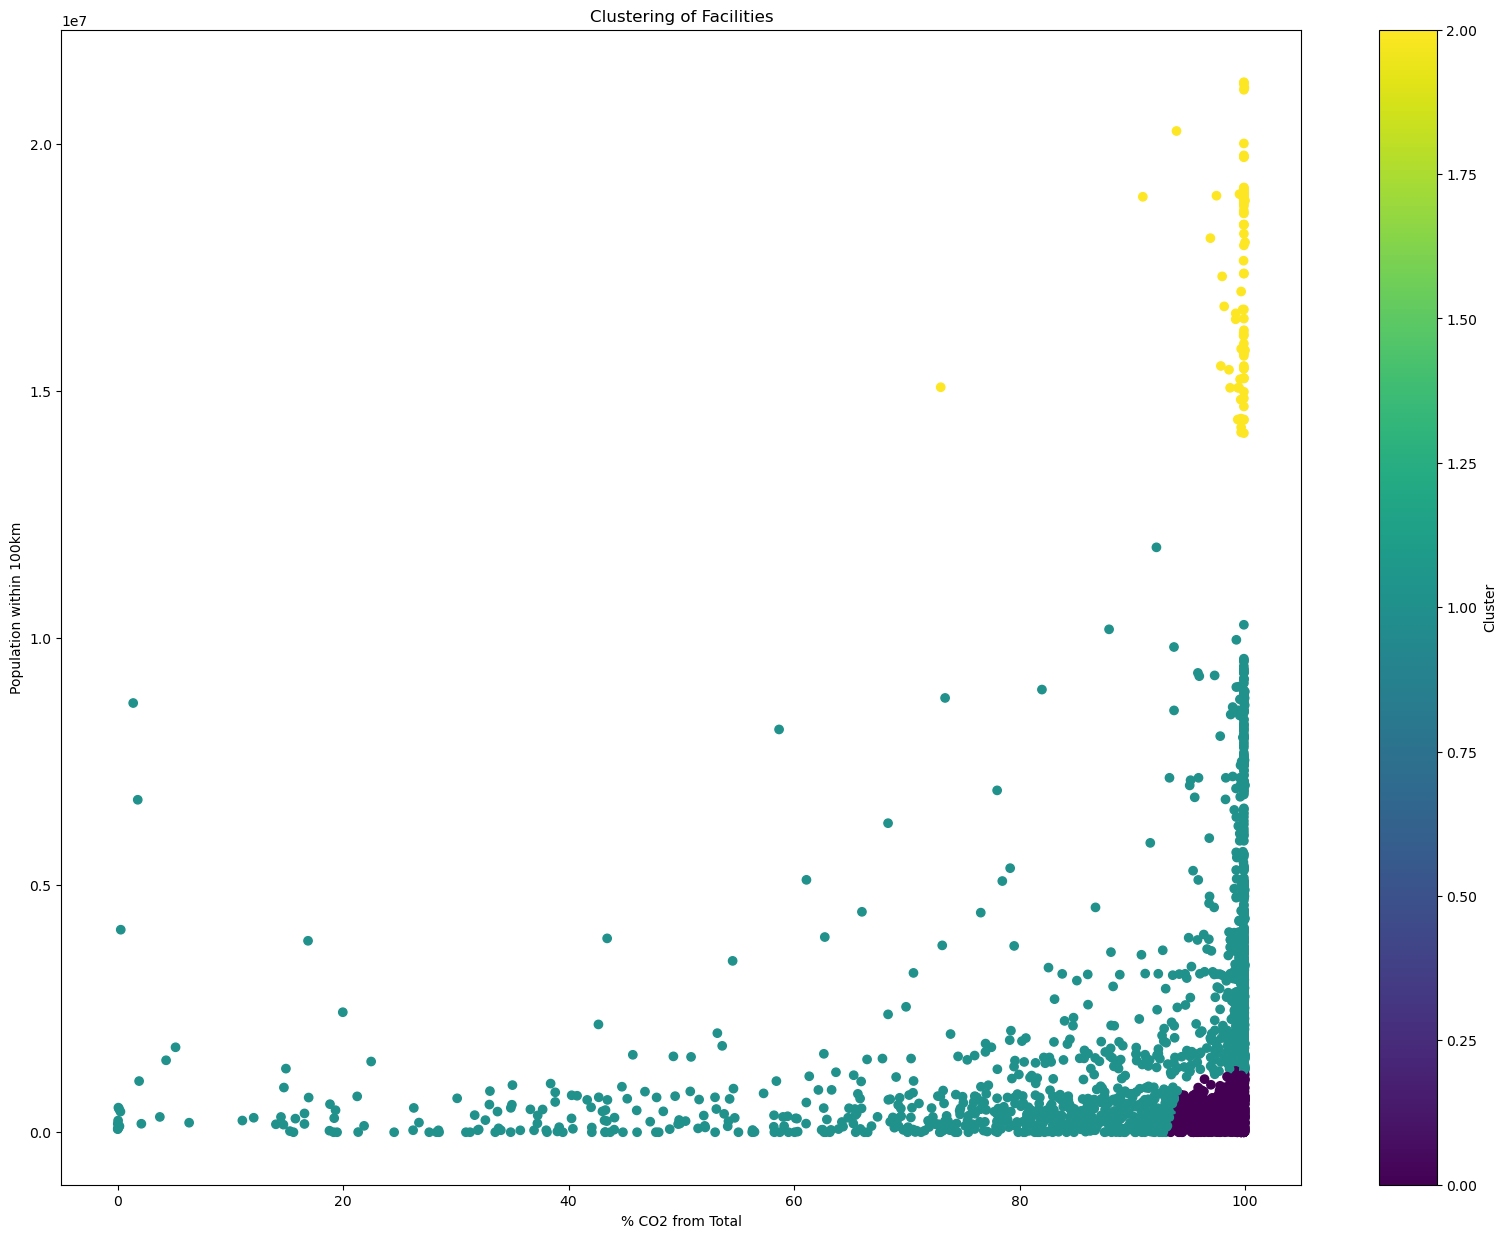

In [81]:
# Choose the number of clusters (K)
num_clusters = 3

# Spectral clustering
spectral = SpectralClustering(n_clusters=num_clusters, random_state=69, affinity='nearest_neighbors')
clusters = spectral.fit_predict(scaled_data2)

# Add the cluster labels to the DataFrame
df_sc['Cluster'] = clusters

# Create the scatter plot
x = data2['%_CO2_from_total']
y = data2['Population_within_100km']
xlab = '% CO2 from Total'
ylab = 'Population within 100km'

scatter = plt.scatter(x, y, c=clusters, cmap='viridis')
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title('Clustering of Facilities')

# Adding a colorbar using the scatter plot as the mappable
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')

plt.show()


In [92]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_data2, clusters)

# Print the Silhouette Score
print("The average silhouette score for the Spectral clustering is:", silhouette_avg)


The average silhouette score for the Spectral clustering is: 0.2669850536777075


In [95]:
df_sc1 = df_sc[df_sc['Cluster'] == 1].copy()
df_sc1.info()
df_sc0 = df_sc[df_sc['Cluster'] == 0].copy()
df_sc0.info()
df_sc2 = df_sc[df_sc['Cluster'] == 2].copy()
df_sc2.info()
print('The mean value of additional features for each cluster obtained via Spectral Clustering')
print('')
print('')
mean_partial_pressure = df_sc0['Partial_Pressure_CO2 (kPa)'].mean()
mean_capture_cost = df_sc0['Capture_Cost ($/ton of CO2)'].mean()
mean_capture_efficiency = df_sc0['Capture_Efficiency (%)'].mean()
print('mean partial pressure in cluster 0')
print(mean_partial_pressure)
print('mean capture cost in cluster 0')
print(mean_capture_cost)
print('mean capture efficinecy in cluster 0')
print(mean_capture_efficiency)
print('')
mean_partial_pressure1 = df_sc1['Partial_Pressure_CO2 (kPa)'].mean()
mean_capture_cost1 = df_sc1['Capture_Cost ($/ton of CO2)'].mean()
mean_capture_efficiency1 = df_sc1['Capture_Efficiency (%)'].mean()
print('mean partial pressure in cluster 1')
print(mean_partial_pressure1)
print('mean capture cost in cluster 1')
print(mean_capture_cost1)
print('mean capture efficinecy in cluster 1')
print(mean_capture_efficiency1)
print('')
mean_partial_pressure1 = df_sc2['Partial_Pressure_CO2 (kPa)'].mean()
mean_capture_cost1 = df_sc2['Capture_Cost ($/ton of CO2)'].mean()
mean_capture_efficiency1 = df_sc2['Capture_Efficiency (%)'].mean()
print('mean partial pressure in cluster 2')
print(mean_partial_pressure1)
print('mean capture cost in cluster 2')
print(mean_capture_cost1)
print('mean capture efficinecy in cluster 2')
print(mean_capture_efficiency1)
print('')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 1 to 3124
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Facility_Id                       1624 non-null   float64
 1   Facility_Name                     1624 non-null   object 
 2   State                             1624 non-null   object 
 3   Latitude                          1624 non-null   float64
 4   Longitude                         1624 non-null   float64
 5   Industry_Type                     1624 non-null   object 
 6   TRDE_eqCO2                        1624 non-null   float64
 7   CO2                               1624 non-null   float64
 8   Population_within_100km           1624 non-null   float64
 9   %_CO2_from_total                  1624 non-null   float64
 10  Industry_Class                    1624 non-null   object 
 11  fuel_type                         1624 non-null   object 
 12  Partia

In [89]:
df_sc2["Industry_Class"].value_counts()

Power Plants:Oil Fired    52
Power Plants:NGCC         32
Natural Gas Processing    11
Refineries                 9
Metals:Steel               4
Paper                      3
Power Plants:Coal          2
Name: Industry_Class, dtype: int64

In [72]:
df_additional

,Industry_Class,Partial_Pressure_CO2 (kPa),Capture_Cost ($/ton of CO2),Capture_Efficiency (%),TRL (Technology Readiness Level),Capture Method
0,Power Plants:NGCC,4.6,80,75,9,Amines
1,Power Plants:Coal,13.0,50,90,9,Amines
2,Power Plants:Oil Fired,10.0,60,90,9,Amines
3,Metals:Steel,30.0,65,50,9,Amines
4,Cement,18.0,40,85,6,Amines
5,Refineries,10.0,60,50,9,Amines
6,Natural Gas Processing,50.0,10,75,9,Amines
7,Paper,16.0,65,60,9,Amines
8,Ethanol,85.0,20,70,8,Dehydration


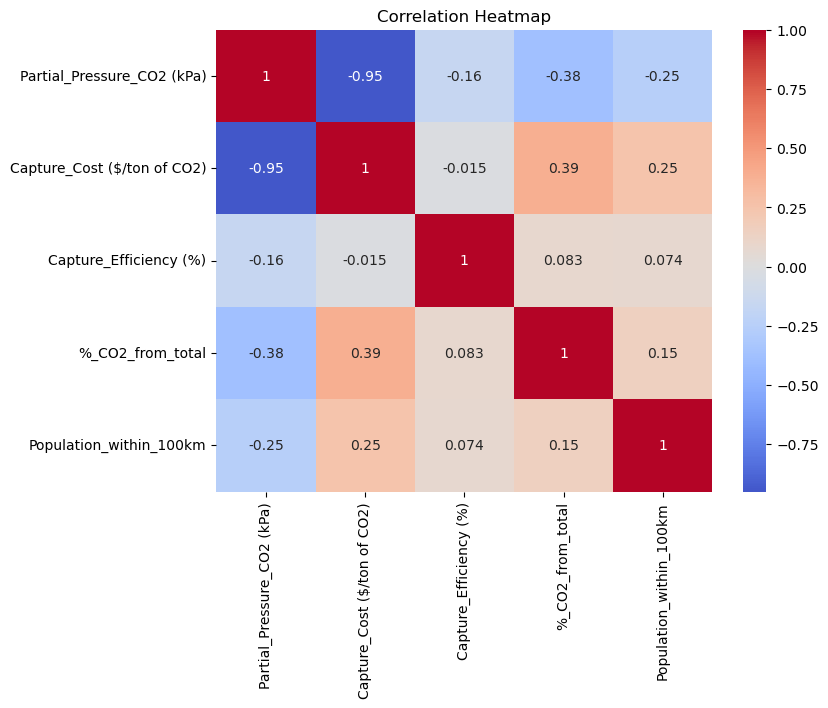

In [76]:
import seaborn as sns


correlation_columns = ['Partial_Pressure_CO2 (kPa)', 'Capture_Cost ($/ton of CO2)', 'Capture_Efficiency (%)','%_CO2_from_total', 'Population_within_100km']

# Calculate the correlation matrix
correlation_matrix = df_sc[correlation_columns].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [77]:
correlation_table = correlation_matrix.to_string()
print("Correlation Matrix:")
print(correlation_table)

Correlation Matrix:
                             Partial_Pressure_CO2 (kPa)  Capture_Cost ($/ton of CO2)  Capture_Efficiency (%)  %_CO2_from_total  Population_within_100km
Partial_Pressure_CO2 (kPa)                     1.000000                    -0.950201               -0.161004         -0.383141                -0.251475
Capture_Cost ($/ton of CO2)                   -0.950201                     1.000000               -0.015215          0.387173                 0.249184
Capture_Efficiency (%)                        -0.161004                    -0.015215                1.000000          0.083171                 0.073524
%_CO2_from_total                              -0.383141                     0.387173                0.083171          1.000000                 0.151760
Population_within_100km                       -0.251475                     0.249184                0.073524          0.151760                 1.000000


In [96]:
df_sc2.head()

,Facility_Id,Facility_Name,State,Latitude,Longitude,Industry_Type,TRDE_eqCO2,CO2,Population_within_100km,%_CO2_from_total,Industry_Class,fuel_type,Partial_Pressure_CO2 (kPa),Capture_Cost ($/ton of CO2),Capture_Efficiency (%),TRL (Technology Readiness Level),Capture Method,Cluster
0,1000112.0,23rd and 3rd,NY,40.66,-74.00,Power Plants,46081.780,46035.2,18910827.0,99.898919,Power Plants:NGCC,Natural Gas,4.6,80,75,9,Amines,2
2,1000766.0,59th Street,NY,40.77,-73.99,Power Plants,180185.666,179998.5,18920120.0,99.896126,Power Plants:Oil Fired,Petroleum Products,10.0,60,90,9,Amines,2
3,1000767.0,74th Street,NY,40.77,-73.95,Power Plants,195068.358,194857.1,18924149.0,99.891701,Power Plants:Oil Fired,Petroleum Products,10.0,60,90,9,Amines,2
10,1001444.0,AES Alamitos,CA,33.77,-118.10,Power Plants,1512393.796,1510858.3,15256153.0,99.898472,Power Plants:NGCC,Natural Gas,4.6,80,75,9,Amines,2
12,1001447.0,AES Huntington Beach,CA,33.64,-117.98,Power Plants,1501324.036,1499799.5,15443534.0,99.898454,Power Plants:NGCC,Natural Gas,4.6,80,75,9,Amines,2


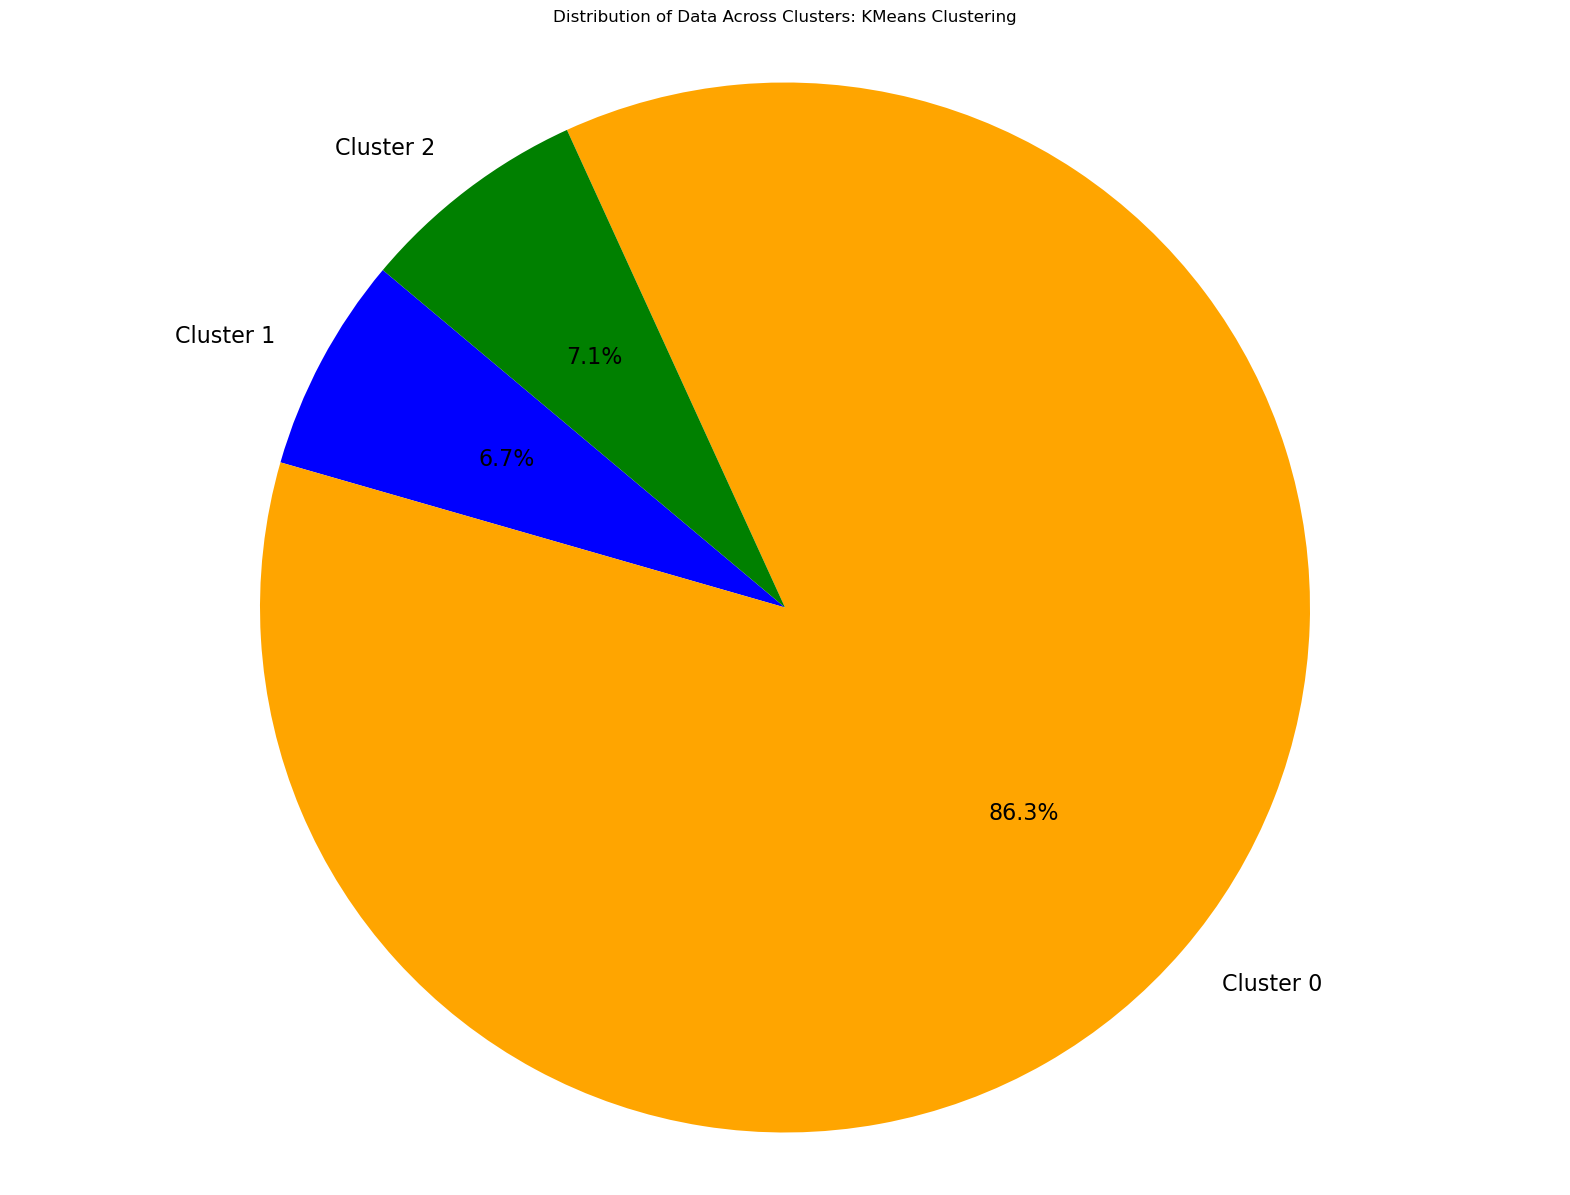

In [102]:
import matplotlib.pyplot as plt

# Cluster sizes
cluster_sizes = [207, 2684, 220]
cluster_labels = ['Cluster 1', 'Cluster 0', 'Cluster 2']
colors = ['blue', 'orange', 'green']

# Create a pie chart
plt.pie(cluster_sizes, labels=cluster_labels, colors=colors, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 16})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Distribution of Data Across Clusters: KMeans Clustering')

# Display the pie chart
plt.show()


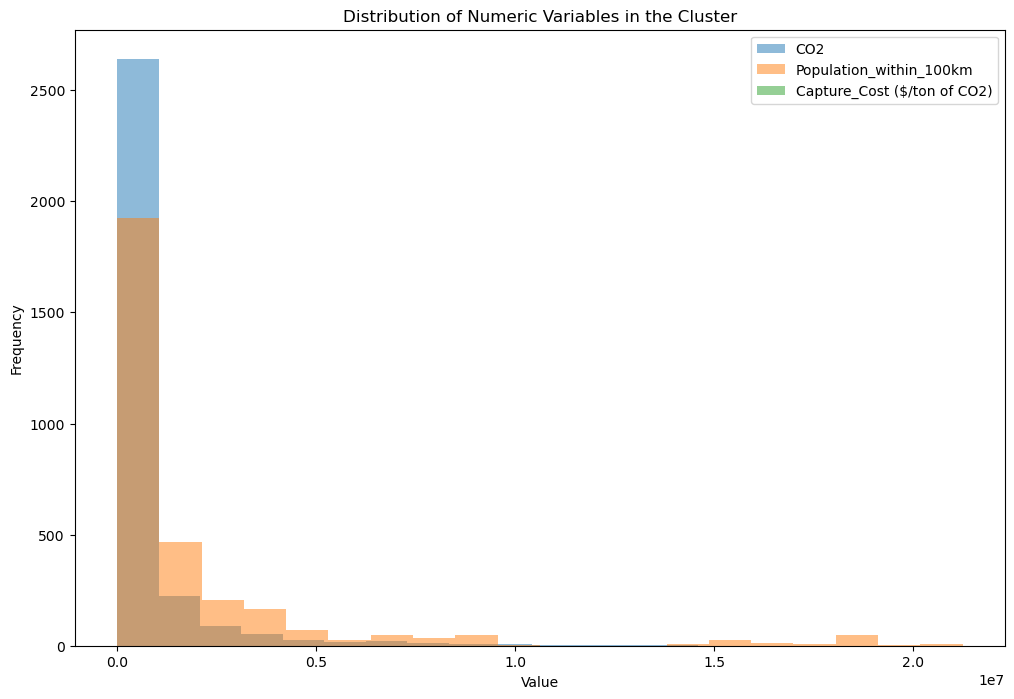

In [105]:
import matplotlib.pyplot as plt

# Numeric variables
numeric_variables = ['CO2', 'Population_within_100km', 'Capture_Cost ($/ton of CO2)']

# Create histograms/distribution plots
plt.figure(figsize=(12, 8))
for var in numeric_variables:
    plt.hist(df_sc[var], bins=20, alpha=0.5, label=var)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Numeric Variables in the Cluster')
plt.legend()
plt.show()


Industry Class Power Plants:Oil Fired: 52 facilities
Industry Class Power Plants:NGCC: 32 facilities
Industry Class Natural Gas Processing: 11 facilities
Industry Class Refineries: 9 facilities
Industry Class Metals:Steel: 4 facilities
Industry Class Paper: 3 facilities
Industry Class Power Plants:Coal: 2 facilities


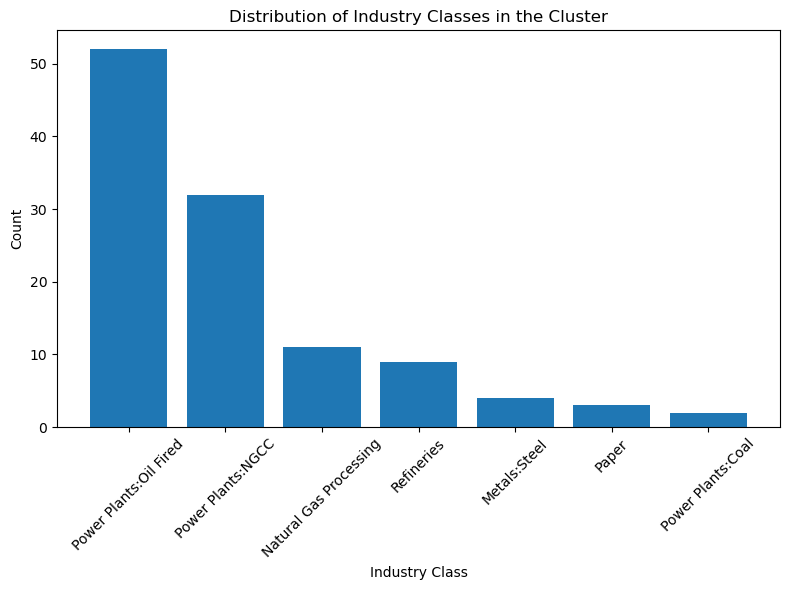

In [121]:
import matplotlib.pyplot as plt

# Count of 'Industry_Type' and 'Industry_Class'
industry_class_counts = df_sc2['Industry_Class'].value_counts()

# Create a smaller figure with a smaller size
plt.figure(figsize=(8, 6))

# Create the bar plot
plt.bar(industry_class_counts.index, industry_class_counts.values)
plt.xlabel('Industry Class')
plt.ylabel('Count')
plt.title('Distribution of Industry Classes in the Cluster')
plt.xticks(rotation=45)

# Print the value count for each class
for industry_class, count in industry_class_counts.items():
    print(f"Industry Class {industry_class}: {count} facilities")

plt.tight_layout()
plt.show()


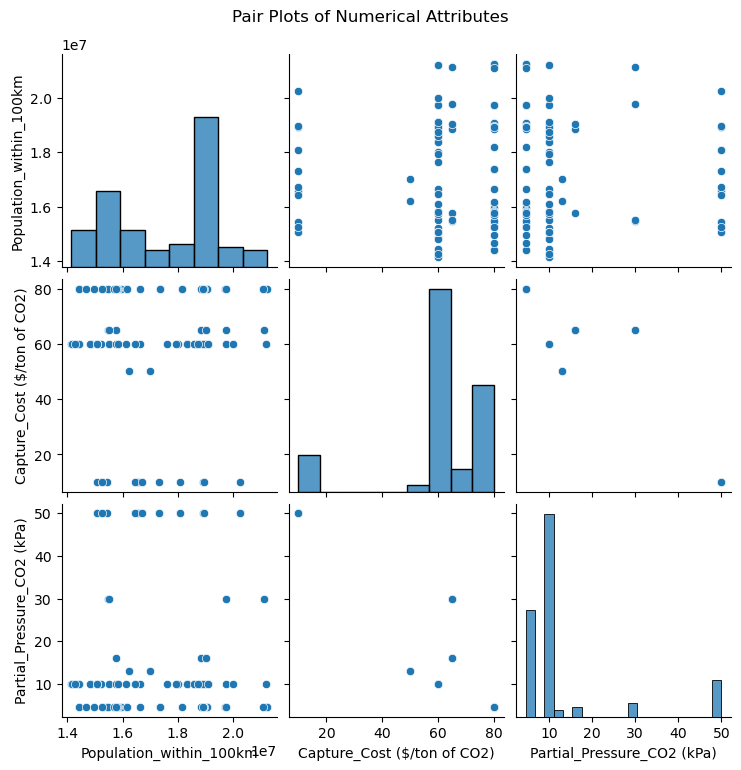

In [115]:
import seaborn as sns

# Subset of numerical attributes
numerical_subset = df_sc2[[ 'Population_within_100km', 'Capture_Cost ($/ton of CO2)','Partial_Pressure_CO2 (kPa)']]

# Create pair plots
sns.pairplot(numerical_subset)
plt.suptitle('Pair Plots of Numerical Attributes', y=1.02)
plt.show()


In [116]:
import folium

# Create a base map
cluster_map = folium.Map(location=[df_sc2['Latitude'].mean(), df_sc2['Longitude'].mean()], zoom_start=5)

# Add markers for each facility
for index, row in df_sc2.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], tooltip=row['Facility_Name']).add_to(cluster_map)

# Display the map
cluster_map
